<img style="float: left;;" src='../Imagenes/iteso.jpg' width="50" height="100"/></a>

# <center> <font color= #000047> Módulo II: Aprendizaje No supervizado: Clustering



# Clustering

> Se le llama “clustering” a la formación de grupos o agrupaciones entre
muestras o entre variables.

> Los “clusters” son formados por datos que cumplen una condición de
agrupación definida en función de algún índice de similitud.

> Los agrupamientos no siempre serán los mismos, ya que depende del tipo de
dato y también depende del tipo de índice de similitud.

> El “Herarchical Clustering” es un algoritmo exhaustivo que realiza la
comparación de todos los datos contra todos. Además es clasificado como un
algoritmo no supervisado, porque no se conoce de antemano los resultados
del proceso de “clustering”.

<div class="alert alert-danger" style="margin: 10px">Diapos.</div>

> Las variables más similares son usadas para crear un cluster o grupo.

> Esto equivale a crear una nueva muestra o nueva variable combinando las similitudes de los pares más similares.
> El criterio más usado es el llamado “complete linkage”.

> Este criterio se basa en crear una nueva muestra o variables eligiendo la máxima similitud del par similar contra los demás datos.

## Métodos de Aglomeración

|Método               |                         | 
|:-------------------:|:------------------------------------------|
|**Complete**             | $d(u,v) = \max(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Single**               | $d(u,v) = \min(d(u[i],k[i]),d(v[i],k[i]))$ |
|**Average**              | $d(u,v) = \frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v}$|
|**Centroid**             | $d(u,v) = ||c_u - c_v ||_2 = \sqrt(\frac{n_u d(u[i],k[i]) + n_v d(v[i],k[i])}{n_u + n_v} - \frac{n_u n_v d(u[i],v[i])}{(n_u + n_v)^2})$                      |
|**Ward**                 | $d(u,v) = \sqrt(\frac{n_u d(u[i],k[i]) + (n_v + n_k) d(v[i],k[i]) - n_k d(u[i],v[i])}{n_u + n_v + n_k})$                      |



## Ejemplo de Clustering Jerárquico

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

from scipy.cluster import hierarchy

In [2]:
np.random.seed(100)
a = np.random.multivariate_normal([10,10],[[3,0],[0,3]], size=[100])
b = np.random.multivariate_normal([0,20],[[3,0],[0,3]], size=[100])
c = np.random.multivariate_normal([20,20],[[3,0],[0,3]], size=[100])

x = np.concatenate((a,b,c))
x

array([[ 6.96931730e+00,  1.05935399e+01],
       [ 1.19971166e+01,  9.56276796e+00],
       [ 1.16996975e+01,  1.08906532e+01],
       [ 1.03830944e+01,  8.14663059e+00],
       [ 9.67178359e+00,  1.04416755e+01],
       [ 9.20667399e+00,  1.07537253e+01],
       [ 8.98918372e+00,  1.14148206e+01],
       [ 1.11651866e+01,  9.81915459e+00],
       [ 9.07979539e+00,  1.17835493e+01],
       [ 9.24112684e+00,  8.06301598e+00],
       [ 1.28041585e+01,  1.26701385e+01],
       [ 9.56373253e+00,  8.54085850e+00],
       [ 1.03195957e+01,  1.16230740e+01],
       [ 1.12661297e+01,  1.23582844e+01],
       [ 9.43493911e+00,  1.00964337e+01],
       [ 1.03852074e+01,  7.50027484e+00],
       [ 8.68995938e+00,  1.14141398e+01],
       [ 1.12998085e+01,  9.21027676e+00],
       [ 1.20604862e+01,  7.07176576e+00],
       [ 7.65064793e+00,  7.86536080e+00],
       [ 9.05700371e+00,  8.84269260e+00],
       [ 1.00126692e+01,  8.93835897e+00],
       [ 1.22512297e+01,  6.99819033e+00],
       [ 8.

In [3]:
len(x)

300

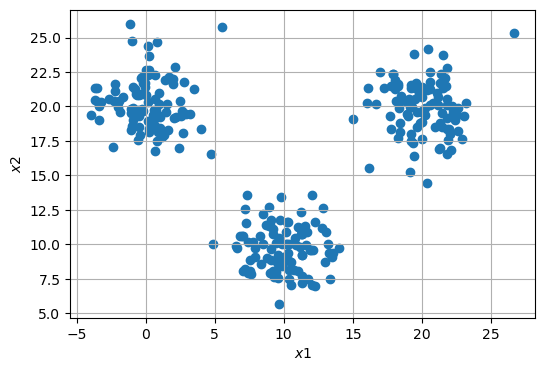

In [4]:
plt.figure(figsize=(6,4))
plt. scatter(x[:,0], x[:,1])
plt.xlabel('$x1$')
plt.ylabel('$x2$')
plt.grid()
plt. show()

In [5]:
help(hierarchy.linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

In [6]:
Z = hierarchy.linkage(x, metric='euclidean',method='single')

In [7]:
len(Z)

299

In [8]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,42.0,300.0,0.055078,3.0
3,17.0,71.0,0.059228,2.0
4,232.0,233.0,0.066203,2.0
...,...,...,...,...
294,269.0,589.0,2.976892,99.0
295,591.0,593.0,4.010378,199.0
296,594.0,595.0,4.397592,298.0
297,151.0,596.0,4.424346,299.0


In [9]:
help(hierarchy.dendrogram)

Help on function dendrogram in module scipy.cluster.hierarchy:

dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, get_leaves=True, orientation='top', labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None, ax=None, above_threshold_color='C0')
    Plot the hierarchical clustering as a dendrogram.
    
    The dendrogram illustrates how each cluster is
    composed by drawing a U-shaped link between a non-singleton
    cluster and its children. The top of the U-link indicates a
    cluster merge. The two legs of the U-link indicate which clusters
    were merged. The length of the two legs of the U-link represents
    the distance between the child clusters. It is also the
    cophenetic distance between original observations in the two
    children clusters.
    
    Parameters
    ----------
    Z : ndarray
        Th

## Criterios de selección de grupos


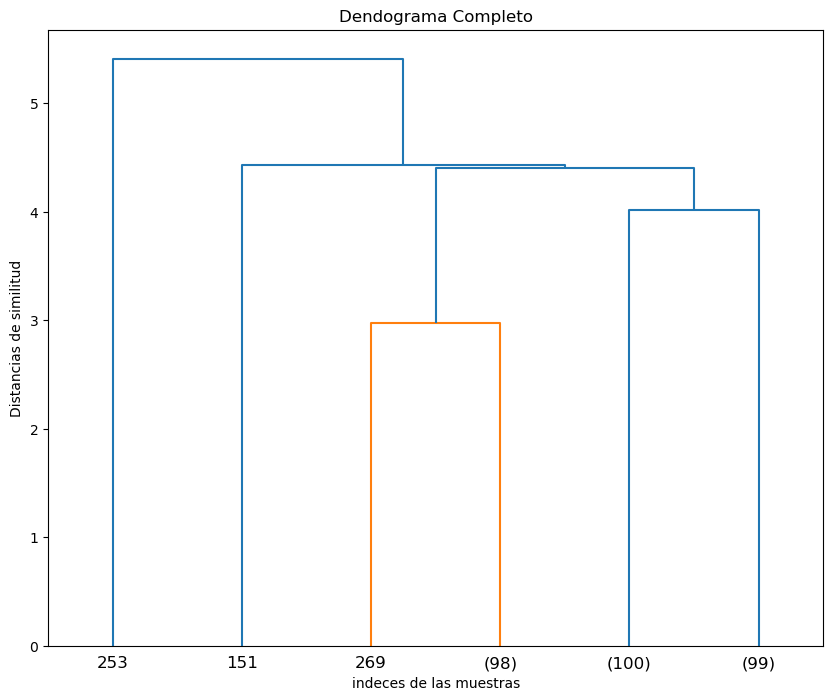

In [15]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z, truncate_mode = 'level',p=3)
plt.title('Dendograma Completo')
plt.xlabel('indeces de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

In [16]:
grupos_opt = 3 
grupos_datos = hierarchy.fcluster(Z,grupos_opt,criterion='maxclust')
# que hace el método fcluster()
grupos_datos

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [17]:
len(grupos_datos)

300

In [18]:
X = pd.DataFrame(x, columns = ['x1','x2'])
X['cluster']=grupos_datos
X

,x1,x2,cluster
0,6.969317,10.593540,1
1,11.997117,9.562768,1
2,11.699697,10.890653,1
3,10.383094,8.146631,1
4,9.671784,10.441675,1
...,...,...,...
295,20.773926,20.257265,1
296,23.180579,20.241911,1
297,16.942595,22.507324,1
298,18.022381,21.292806,1


In [19]:
class Clustering
    def__init__(df):
        self.df=df
        
def clustering_jerarquico(x_df, metric, criterio)

    plots()
    return Z, X_df_grups

def crit_gradiente
def crit_codo


SyntaxError: expected ':' (1949835658.py, line 1)

In [20]:
from CDIN import Clustering as clust

ImportError: cannot import name 'Clustering' from 'CDIN' (/Users/gustavodeandamadrigal/Downloads/CIENCIA DE DATOS/CDIN_O2023/Modulo2/Code/CDIN.py)

In [21]:
c1 = clust(df)
cl.clustering_jerarquico()

NameError: name 'clust' is not defined

## Otros criterios de selección

### Criterio del Codo (1er criterio)


In [22]:
pd.DataFrame(Z)

,0,1,2,3
0,69.0,94.0,0.020460,2.0
1,43.0,53.0,0.042133,2.0
2,42.0,300.0,0.055078,3.0
3,17.0,71.0,0.059228,2.0
4,232.0,233.0,0.066203,2.0
...,...,...,...,...
294,269.0,589.0,2.976892,99.0
295,591.0,593.0,4.010378,199.0
296,594.0,595.0,4.397592,298.0
297,151.0,596.0,4.424346,299.0


In [23]:
last = Z[-30:,2]
last_rev = last[::-1]
indx_group = np.arange(1, len(last_rev)+1)
indx_group

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [24]:
last_rev

array([5.40468423, 4.42434565, 4.39759214, 4.01037819, 2.97689153,
       1.93314507, 1.82475884, 1.67099711, 1.6246834 , 1.55072556,
       1.50015775, 1.30887088, 1.25689932, 1.23727242, 1.21948169,
       1.2106061 , 1.20349228, 1.16377436, 1.16276726, 1.15223903,
       1.12338811, 1.10035789, 1.08989054, 1.08028215, 1.06717261,
       1.03296521, 1.01464728, 1.00563359, 0.98325005, 0.97249842])

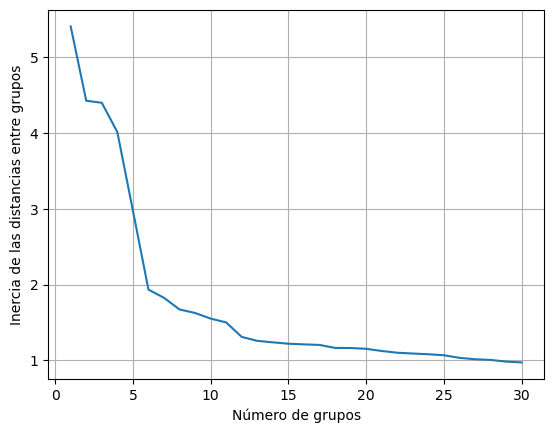

In [25]:
# Grafica del criterio del codo
plt.plot(indx_group, last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

In [26]:
def criterio_codo(Z, n_grupos):
    last = Z[-n_grupos: ,2]
    last_rev = last[::-1]
    indx_group = np. arange(1,len(last_rev)+1)
    #Gráfica del codo
    plt. plot (indx_group, last_rev)
    plt.xlabel ('Número de grupos')
    plt.ylabel('Inercia de las distancias entre grupos')
    plt. grid()
    plt. show()
    

In [27]:
criterio_codo[Z,30]

TypeError: 'function' object is not subscriptable

### Criterio del gradiente


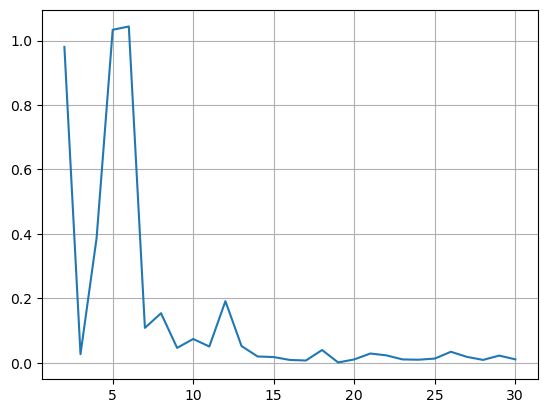

In [28]:
last = Z[-30:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(2,len(grad_rev)+2)
# Graficar el criterio del gradiente 
plt.plot(indx_group, grad_rev)
plt.grid()
plt.show()


In [29]:
def criterio_gradiente(Z, n_grupos)
    last = Z[-n_grupos:,2]
    gradiente = np.diff(last)
    grad_rev = gradiente[::-1]

    indx_group = np.arange(2,len(grad_rev)+2)
    # Graficar el criterio del gradiente 
    plt.plot(indx_group, grad_rev)
    plt.grid()
    plt.show()


SyntaxError: expected ':' (3420619575.py, line 1)

## Aplicar número de grupos opt

## Ejemplo 2: 

Consideremos el datasety `shopping-data.csv`, este dataset contiene información sobre el ingreso anual y gastos de clientes de una empresa.

Conservaremos las columnas Ingresos anuales (en miles de dólares) y Puntuación de gastos (1-100). La columna Spending Score indica la frecuencia con la que una persona gasta dinero en un centro comercial en una escala del 1 al 100, siendo 100 el que más gasta.

In [122]:
data = pd.read_csv('../Data/shopping-data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [123]:
data_split = data.iloc[:,-2:]
data_split

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [124]:
data_split.values

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

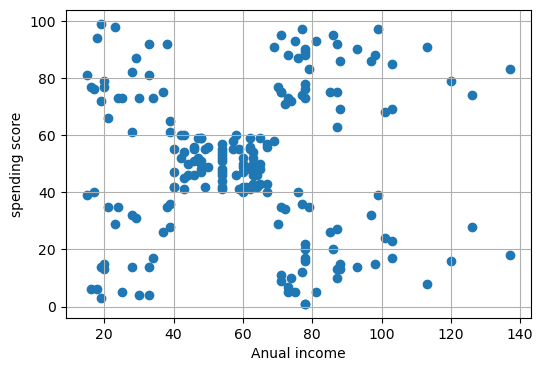

In [125]:
#visulizar datod anual income vs spending score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1])
plt.xlabel('Anual income')
plt.ylabel('spending score')
plt.grid()
plt.show()

In [126]:
Z = hierarchy.linkage(data_split.values, metric='euclidean',method='ward')
len(Z)

199

In [127]:
pd.DataFrame(Z)

,0,1,2,3
0,65.0,68.0,0.000000,2.0
1,48.0,49.0,0.000000,2.0
2,156.0,158.0,0.000000,2.0
3,129.0,131.0,0.000000,2.0
4,21.0,23.0,1.000000,2.0
...,...,...,...,...
194,384.0,386.0,113.886017,32.0
195,391.0,392.0,245.654601,108.0
196,387.0,395.0,262.562634,129.0
197,393.0,394.0,394.859658,71.0


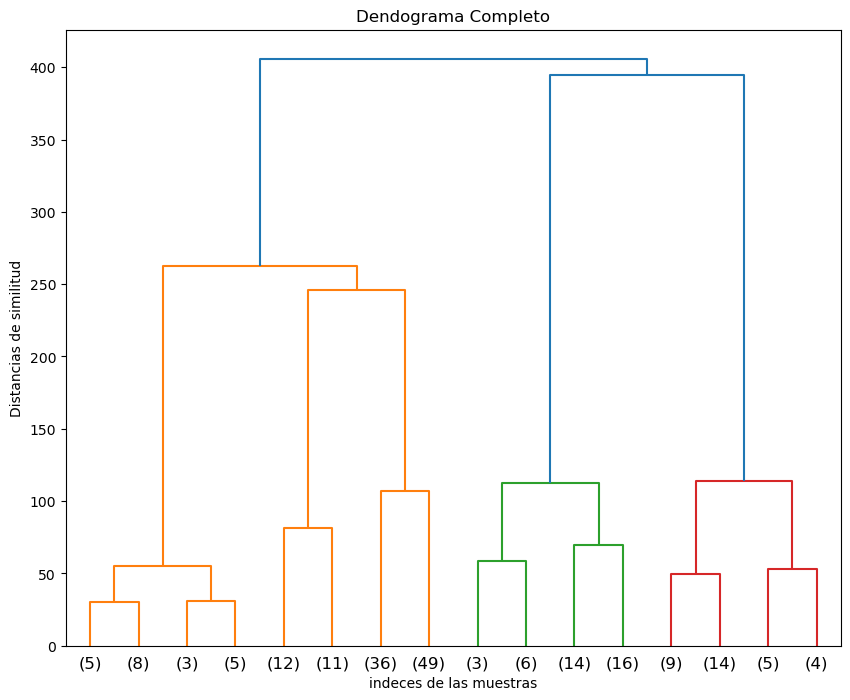

In [128]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z, truncate_mode = 'level',p=3)
plt.title('Dendograma Completo')
plt.xlabel('indeces de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

podemos decir que son 5 grupos debido a que el verde y rojo son de tamaños diferentes y se dividiría en 2 el amarillo

In [129]:
#CODO

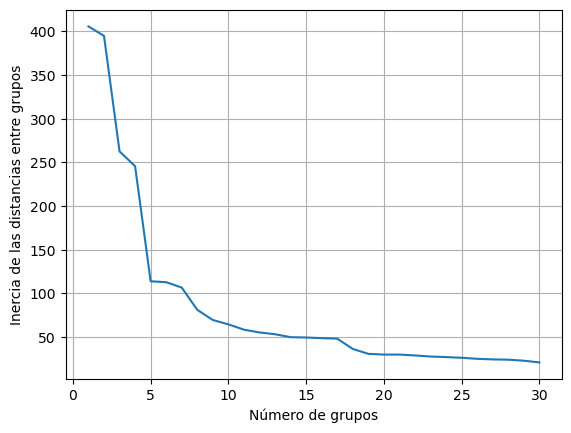

In [130]:
last = Z[-30:,2]
last_rev = last[::-1]
indx_group = np.arange(1, len(last_rev)+1)
indx_group
# Grafica del criterio del codo
plt.plot(indx_group, last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

podemos ver como a partir de 5 se empiezan a estabilizar los datos

In [131]:
#gradiente

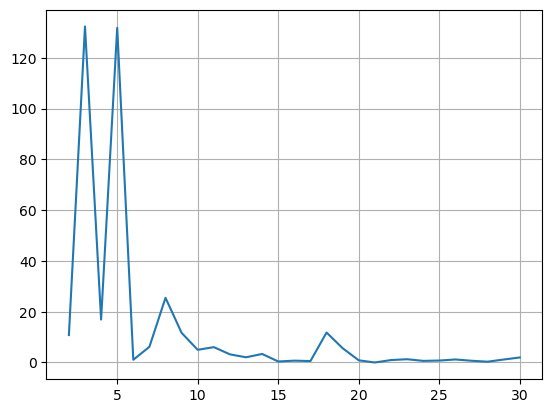

In [132]:
last = Z[-30:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(2,len(grad_rev)+2)
# Graficar el criterio del gradiente 
plt.plot(indx_group, grad_rev)
plt.grid()
plt.show()


In [133]:
# con el criterio del gradiente se puede observar que se puede clusterizar en 3,5, 7 u 8 pero es mas entre 5 y 7 

In [134]:
grup_opt = 5
grupos_datos = hierarchy.fcluster(Z, grup_opt, criterion='maxclust')


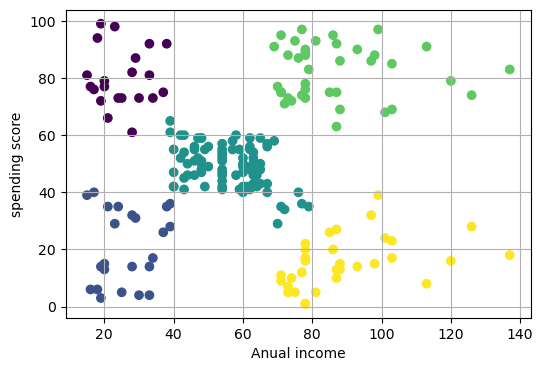

In [135]:
#visulizar datod anual income vs spending score
plt.figure(figsize=(6,4))
plt.scatter(data_split.values[:,0],data_split.values[:,1], c=grupos_datos)
plt.xlabel('Anual income')
plt.ylabel('spending score')
plt.grid()
plt.show()

In [136]:
## realizar lo anterior usando las columnas: gender, age, anual income, spending score

In [137]:
data_new = data.iloc[:,-4:]
data_new

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [138]:
data_new['genre_code'] = data['Genre'].map({'Male':0,'Female':1})
data_new = data_new.iloc[:,-4:]
data_new

,Age,Annual Income (k$),Spending Score (1-100),genre_code
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [139]:
Z = hierarchy.linkage(data_new.values, metric='euclidean',method='ward')
len(Z)

199

In [140]:
pd.DataFrame(Z)

,0,1,2,3
0,65.0,68.0,1.000000,2.0
1,129.0,131.0,1.000000,2.0
2,3.0,5.0,1.732051,2.0
3,48.0,49.0,2.000000,2.0
4,106.0,109.0,2.236068,2.0
...,...,...,...,...
194,390.0,391.0,180.040832,83.0
195,389.0,394.0,243.919731,106.0
196,378.0,395.0,277.421535,126.0
197,392.0,393.0,397.747968,74.0


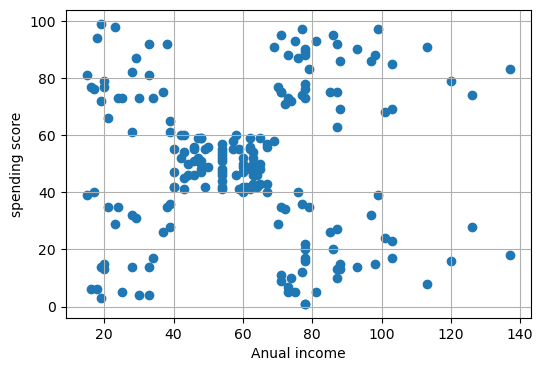

In [141]:
#visulizar datod anual income vs spending score
plt.figure(figsize=(6,4))
plt.scatter(data_new.values[:,1],data_new.values[:,2])
plt.xlabel('Anual income')
plt.ylabel('spending score')
plt.grid()
plt.show()

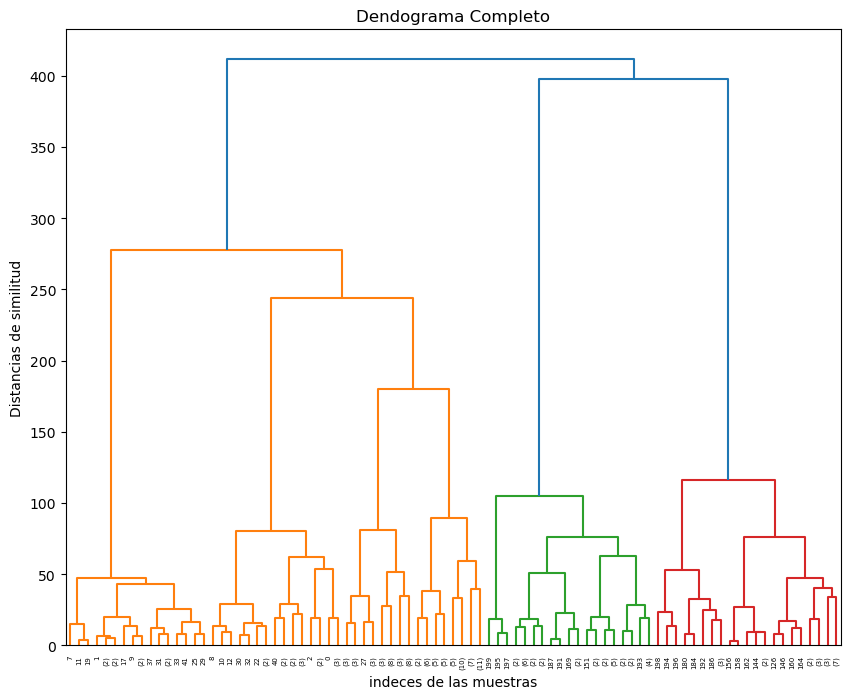

In [142]:
plt.figure(figsize=(10,8))
dn = hierarchy.dendrogram(Z, truncate_mode = 'level',p=6)
plt.title('Dendograma Completo')
plt.xlabel('indeces de las muestras')
plt.ylabel('Distancias de similitud')
plt.show()

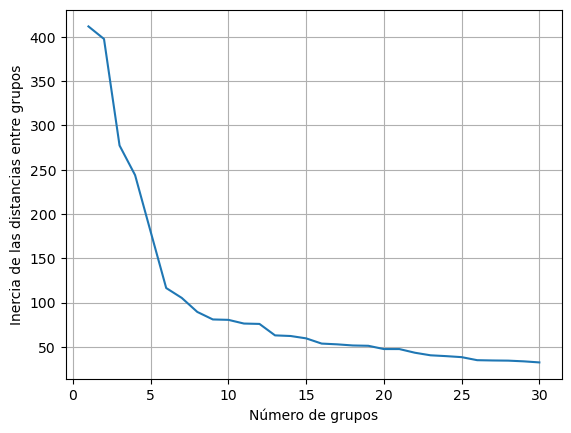

In [143]:
last = Z[-30:,2]
last_rev = last[::-1]
indx_group = np.arange(1, len(last_rev)+1)
indx_group
# Grafica del criterio del codo
plt.plot(indx_group, last_rev)
plt.xlabel('Número de grupos')
plt.ylabel('Inercia de las distancias entre grupos')
plt.grid()
plt.show()

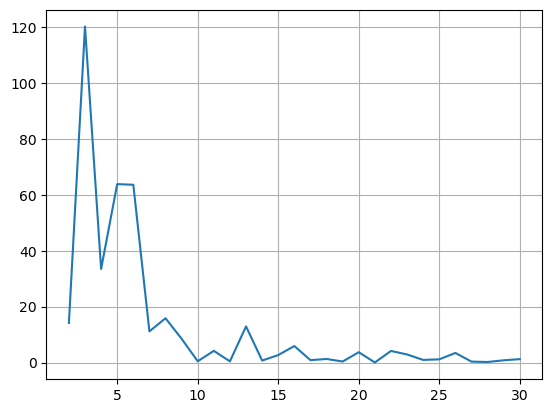

In [144]:
last = Z[-30:,2]
gradiente = np.diff(last)
grad_rev = gradiente[::-1]

indx_group = np.arange(2,len(grad_rev)+2)
# Graficar el criterio del gradiente 
plt.plot(indx_group, grad_rev)
plt.grid()
plt.show()


In [145]:
# al igual me salieron entre valores de agrupación 5 y 7 

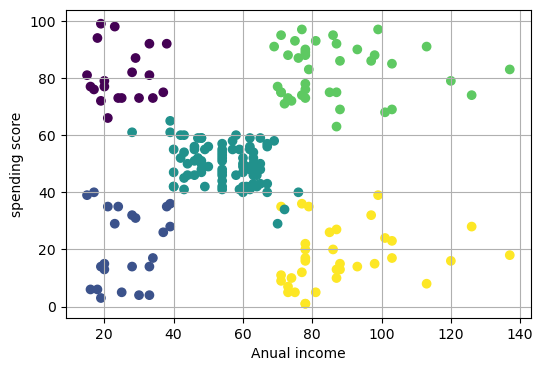

In [146]:
grup_opt = 5
grupos_datos = hierarchy.fcluster(Z, grup_opt, criterion='maxclust')
#visulizar datod anual income vs spending score
plt.figure(figsize=(6,4))
plt.scatter(data_new.values[:,1],data_new.values[:,2], c=grupos_datos)
plt.xlabel('Anual income')
plt.ylabel('spending score')
plt.grid()
plt.show()